In [1]:
using Plots
function old_pick_colors(grad,n)
    grad=colorscheme(grad)
    RGB[getColorZ(grad,z) for z in Plots.getpctrange(n)]
end

INFO: Recompiling stale cache file /home/tom/.julia/lib/v0.4/Plots.ji for module Plots.


old_pick_colors (generic function with 1 method)

In [2]:
# without specifying the background color, you get colors that are hard to see
cols = distinguishable_colors(20)[2:end]

In [3]:
# ugly, plus many similar, but at least you can see them
cols = distinguishable_colors(20,colorant"white")[2:end]

In [4]:
# this is the default gradient used as the base for color picking now
rainbow = colorscheme(:darkrainbow)
RGB[getColorZ(rainbow,z) for z in linspace(0,1,100)]

In [5]:
# try out a new gradient
new_colorgradient = colorscheme([colorant"darkblue", colorant"blueviolet",  colorant"darkcyan",colorant"green",
    Plots.darken(colorant"yellow",0.3), colorant"orange", Plots.darken(colorant"red",0.2)])
        #[0, 0.15, 0.3, 0.45, 0.7, 1.0]) # add z-values for each color to make gradient non-linear
RGB[getColorZ(new_colorgradient,z) for z in linspace(0,1,100)]

In [6]:
# a different method to choose from the gradient
function new_get_zvalues(n::Int)
    offsets = Plots.getpctrange(ceil(Int,n/4)+1)/4
    offsets = vcat(offsets[1], offsets[3:end])
    zvalues = Float64[]
    for offset in offsets
        append!(zvalues, offset + [0.0, 0.5, 0.25, 0.75])
    end
    vcat(zvalues[1], 1.0, zvalues[2:n-1])
end

# and a method to display the colors we will choose
function new_pick_colors(grad,n)
    grad=colorscheme(grad)
    RGB[getColorZ(grad,z) for z in new_get_zvalues(n)]
end

new_pick_colors (generic function with 1 method)

In [19]:
# old gradient with old color picker
# better (IMO) than the distinguishable_colors... first 5 colors are good, but then it gets worse
# NOTE: this is the current default palette
oldgrad_oldcolors = old_pick_colors(:darkrainbow,20)

In [30]:
# new gradient with old color picker... darker, with less blue
newgrad_oldcolors = old_pick_colors(new_colorgradient, 20)

In [31]:
# old gradient with new color picker... colors are the same but ordering is different... better randomization
oldgrad_newcolors = new_pick_colors(rainbow, 20)

In [32]:
# new gradient with new color picker
newgrad_newcolors = new_pick_colors(new_colorgradient, 20)

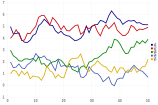

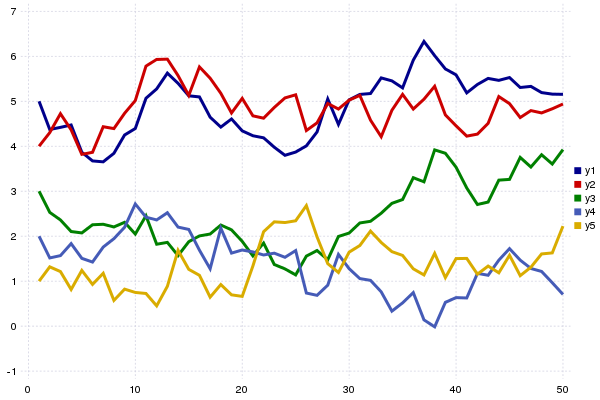

In [33]:
# plot a few colors (it's important that these look ok)
gadfly()
default(size=(600,400))
plot(Plots.fakedata(50,5)/3 .+ reverse(1:5)', l=(3, newgrad_newcolors'))

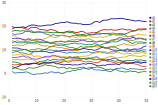

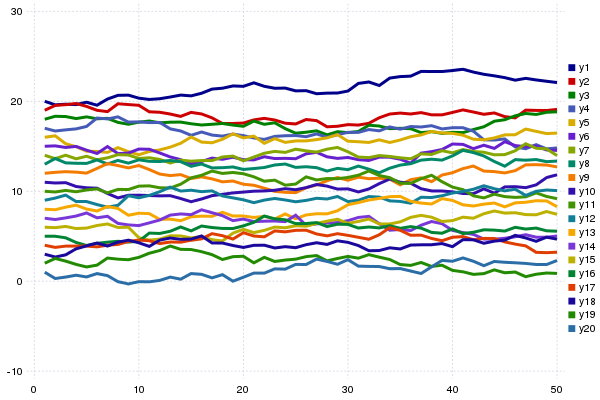

In [34]:
# plot many colors (no hue should dominate your attention)
plot(Plots.fakedata(50,20)/3 .+ reverse(1:20)', l=(3, newgrad_newcolors'))

In [35]:
# notice that we have unlimited unique colors this way
colors = new_pick_colors(new_colorgradient, 1000)
length(unique(colors))

1000

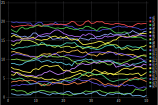

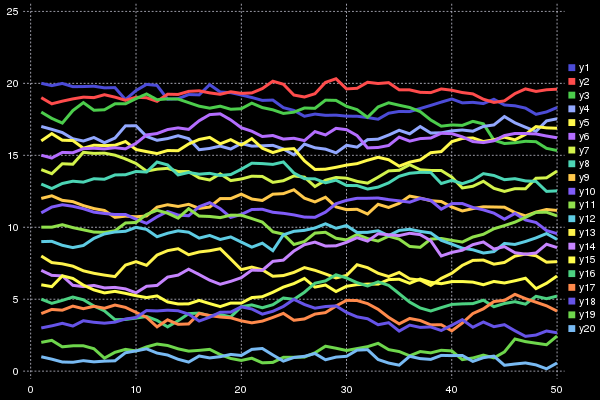

In [36]:
# here's how we might adjust for a dark background
lightcolors = map(c->Plots.lighten(c,0.3), newgrad_newcolors')
plot(Plots.fakedata(50,20)/3 .+ reverse(1:20)', l=(3, lightcolors), bg=:black)

In [52]:
# and could consider other palettes for backgrounds with a certain hue, for example orange background:
orangebg_colorgradient = colorscheme([colorant"darkslateblue", colorant"violet", 
    colorant"lightgreen", colorant"darkcyan",colorant"mediumturquoise", colorant"mediumvioletred"])
RGB[getColorZ(orangebg_colorgradient,z) for z in linspace(0,1,100)]

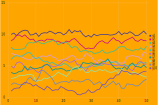

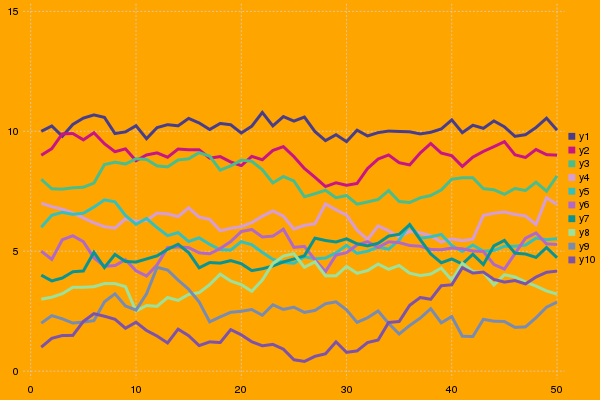

In [53]:
plot(Plots.fakedata(50,10)/3 .+ reverse(1:10)', l=(3, new_pick_colors(orangebg_colorgradient,20)'), bg=:orange)

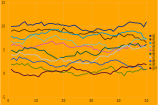

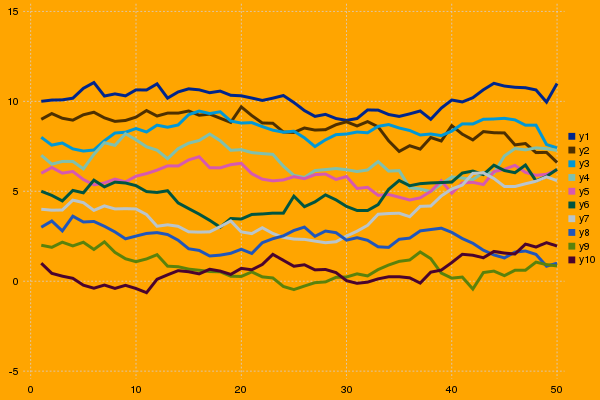

In [54]:
# or just use distinguishable colors when the background isn't a shade of gray
cols = distinguishable_colors(20,colorant"orange")[2:end]
plot(Plots.fakedata(50,10)/3 .+ reverse(1:10)', l=(3, new_pick_colors(cols,20)'), bg=:orange)